<a href="https://colab.research.google.com/github/Lorandoff/Data-Science/blob/3/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer churn

Customers began to leave Beta-Bank. Every month. A little, but noticeable. Banking marketers figured it was cheaper to keep current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. You are provided with historical data on customer behavior and termination of agreements with the bank.

Build a model with an extremely large *F1*-measure. To pass the project successfully, you need to bring the metric to 0.59. Check the *F1*-measure on the test set yourself.

Additionally measure *AUC-ROC*, compare its value with *F1*-measure.

Data Source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Data preparation

In [3]:
!pip install sklearn
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
data = pd.read_csv("datasets/Churn.csv")
display(data)
data.info()

#Remove unnecessary columns
data = data.drop(["RowNumber"], axis = 1)

# Just in case, copy the table to a new variable
data2 = data.copy()

#Create dummy features for columns with categorical variables
data2 = pd.get_dummies(data2, columns = ["Geography", "Gender"], drop_first = True) 

#Delete the remaining unnecessary columns
data2 = data2.drop(["CustomerId", "Surname"], axis = 1)

#Get a table with missing values
data_nan2 = data2[data2.isnull().any(axis = 1)]

#data2 = data2.dropna().reset_index(drop = True)
#scaler.fit(data2)

data_nan2 = data2[data2.isnull().any(axis = 1)]
display(data_nan2)
data_nan2.info()


#Remove missing values
data2 = data2.dropna().reset_index(drop = True)
display(data2)
data2.info()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2.0       0.00              1          1               1   
1        1.0   83807.86              1          0               1   
2        8.0  159660.80              3          1               0   
3        1.0       0.00              2          0               0   
4        2.0  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995     5.0       0.00              2          1               0   
9996    10.0   57369.61              1          1               1   
9997     7.0       0.00              1          0               1   
9998     3.0   75075.31              2          1               0   
9999     NaN  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
30            591   39     NaN       0.00              3          1   
48            550   38     NaN  103391.38              1          0   
51            585   36     NaN  146050.97              2          0   
53            655   41     NaN  125561.97              1          0   
60            742   35     NaN  136857.00              1          0   
...           ...  ...     ...        ...            ...        ...   
9944          744   41     NaN  190409.34              2          1   
9956          520   46     NaN   85216.61              1          1   
9964          479   34     NaN  117593.48              2          0   
9985          659   36     NaN  123841.49              2          1   
9999          792   28     NaN  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
30                 0        140469.38       1                  0   
48                 1         90878.13       0                  1   
51                 0         86424.57       0                  1   
53                 0        164040.94       1                  1   
60                 0         84509.57       0                  1   
...              ...              ...     ...                ...   
9944               1        138361.48       0                  1   
9956               0        117369.52       1                  0   
9964               0        113308.29       0                  0   
9985               0         96833.00       0                  0   
9999               0         38190.78       0                  0   

      Geography_Spain  Gender_Male  
30                  1            0  
48                  0            1  
51                  0            1  
53                  0            1  
60                  0            1  
...               ...          ...  
9944                0            1  
9956                0            0  
9964                0            1  
9985                0            1  
9999                0            0  

[909 rows x 12 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 30 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        909 non-null    int64  
 1   Age                909 non-null    int64  
 2   Tenure             0 non-null      float64
 3   Balance            909 non-null    float64
 4   NumOfProducts      909 non-null    int64  
 5   HasCrCard          909 non-null    int64  
 6   IsActiveMember     909 non-null    int64  
 7   EstimatedSalary    909 non-null    float64
 8   Exited             909 non-null    int64  
 9   Geography_Germany  909 non-null    uint8  
 10  Geography_Spain    909 non-null    uint8  
 11  Gender_Male        909 non-null    uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 73.7 KB


CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42     2.0       0.00              1          1   
1             608   41     1.0   83807.86              1          0   
2             502   42     8.0  159660.80              3          1   
3             699   39     1.0       0.00              2          0   
4             850   43     2.0  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9086          800   29     2.0       0.00              2          0   
9087          771   39     5.0       0.00              2          1   
9088          516   35    10.0   57369.61              1          1   
9089          709   36     7.0       0.00              1          0   
9090          772   42     3.0   75075.31              2          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1                  0   
1                  1        112542.58       0                  0   
2                  0        113931.57       1                  0   
3                  0         93826.63       0                  0   
4                  1         79084.10       0                  0   
...              ...              ...     ...                ...   
9086               0        167773.55       0                  0   
9087               0         96270.64       0                  0   
9088               1        101699.77       0                  0   
9089               1         42085.58       1                  0   
9090               0         92888.52       1                  1   

      Geography_Spain  Gender_Male  
0                   0            0  
1                   1            0  
2                   0            0  
3                   0            0  
4                   1            0  
...               ...          ...  
9086                0            0  
9087                0            1  
9088                0            1  
9089                0            0  
9090                0            1  

[9091 rows x 12 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   uint8  
 10  Geography_Spain    9091 non-null   uint8  
 11  Gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 666.0 KB


# Conclusion:


1. Removed 3 useless columns for us with the row number ("RowNumber"), unique identifier ("CostumerId") and last name ("Surname").


2. Received dummy features for columns with categorical variables ("Georgaphy", "Gender").
    
    2.1 one-hot-encoding instead of ordinalencoder, because the test results were better with OHE.
    
    
3. There are missing values ​​in the table, in the "Tenure" column, in order to fill them in, I decided to select all rows with gaps in
    a separate table, and then using machine learning methods to predict the values ​​in the column based on the data.
    
   
4. We standardize the data in columns with quantitative variables and combine this table with the rest of the columns.


Signs:

RowNumber - row index in data

CustomerId - unique customer identifier

Surname - surname

CreditScore - credit rating

Geography - country of residence

gender

Age - age

Tenure - how many years a person has been a bank client

Balance - account balance

NumOfProducts - the number of bank products used by the client

HasCrCard - the presence of a credit card

IsActiveMember - client activity

EstimatedSalary - estimated salary

Target feature:
Exited - the fact that the client left

Here we check the data for multicollinearity and look at the distribution of the target feature.

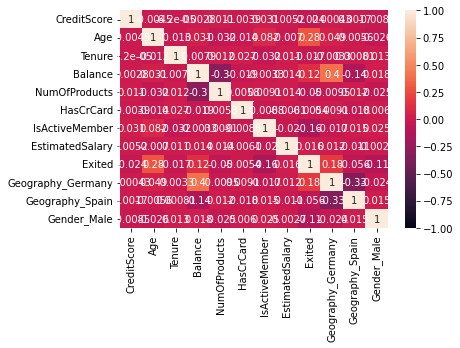

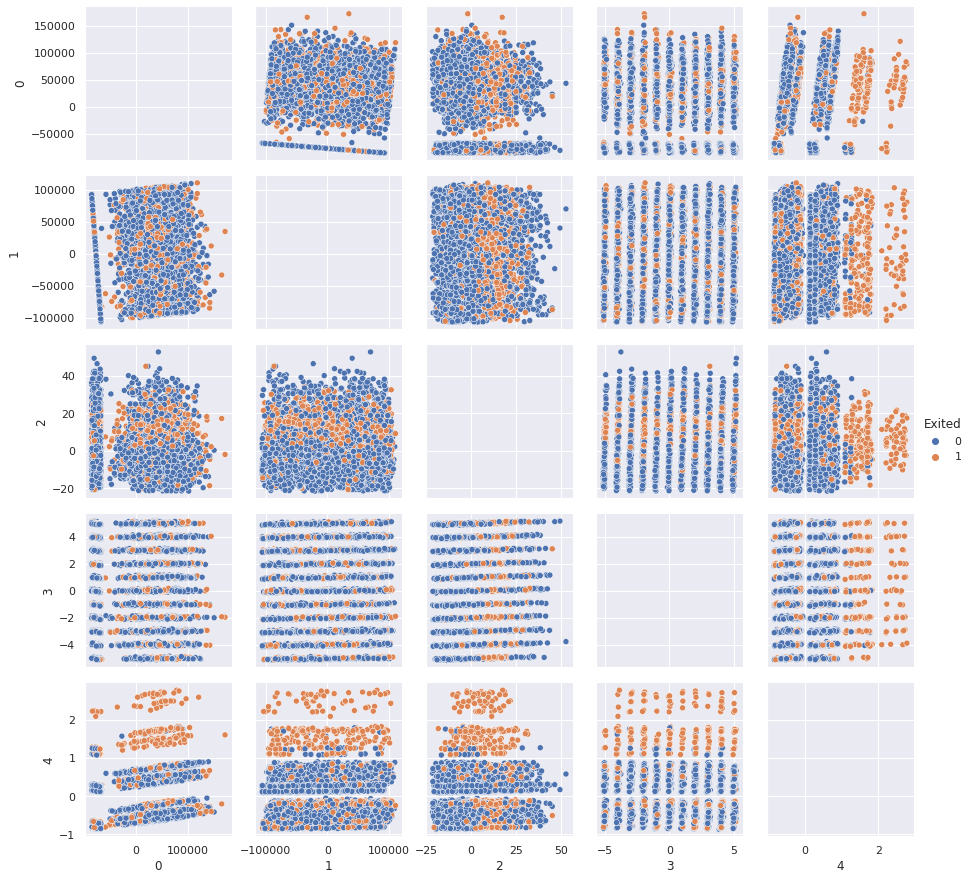

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
components = pd.DataFrame(pca.fit_transform(data2[data2.columns[1:-1]]))
components["Exited"] = data2["Exited"].reset_index(drop = True)
sns.heatmap(data2.corr(), vmin = -1, vmax = 1, annot = True)
sns.set(rc = {"figure.figsize" : (10, 10)})
plt.show()
g = sns.PairGrid(components, hue = "Exited")
#g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

As can be seen from the heat map, multicollinearity does not threaten us. But distribution is more difficult. Firstly: There is an imbalance of classes (even if you just look, there are more blue dots than orange ones), and secondly: the data is rather dirty, the distribution will not be easy to divide into categories, and the usual linear classifier without parameters will not work here.


P.S I wanted to solve this problem using the Gaussian mixture model, but it took so long to generate samples that I could not stand it and decided to do without it, since the results were good.

# Choose a model to fill in the gaps

In [5]:
from sklearn import model_selection

# Divide the sample into features and target feature
features = data2.drop(["Tenure"], axis = 1)
target = data2["Tenure"]

#Get training and validation sets
data_train, data_valid = train_test_split(data2, test_size = 0.25, random_state = 12345)
#print(features_train.shape, target_train.shape)
#data_train.info()
#data_valid.info()

#Standardize columns with scale variables in the training set
data_scaler2 = data_train.drop(["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"], axis = 1).reset_index(drop = True)
data_scaler = data_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]].reset_index(drop = True)
scaler.fit(data_scaler)
data_scaler = pd.DataFrame(scaler.transform(data_scaler), columns = data_scaler.columns)

#Combine the standardized table with the rest of the features
data_train = data_scaler.join(data_scaler2)
features_train = data_train.drop(["Tenure"], axis = 1)
target_train = data_train["Tenure"]

print("data_train:", features_train.shape, target_train.shape)
#display(data_train)


#display(data_valid)

#display(features_train, target_train)

#features_train.info()

#target_train.info()

#display(features_valid, target_valid)

#print(features_train[0])
#print(target_train[0])
#features_train = features_train.to_numpy().reshape(-1, 1)
#target_train = target_train.to_numpy().reshape(-1, 1).ravel()

data_train: (6818, 11) (6818,)


In [6]:
#Standardize columns with quantitative variables in the validation set
data_scaler_valid2 = data_valid.drop(["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"], axis = 1).reset_index(drop = True)
data_scaler_valid = data_valid[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]].reset_index(drop = True)
data_scaler_valid = pd.DataFrame(scaler.transform(data_scaler_valid), columns = data_scaler_valid.columns)

#Combine the standardized table with the rest of the features
data_valid = data_scaler_valid.join(data_scaler_valid2)
features_valid = data_valid.drop(["Tenure"], axis = 1)
target_valid = data_valid["Tenure"]

print("data_valid:", features_valid.shape, target_valid.shape)

data_valid: (2273, 11) (2273,)


In [7]:
#Standardize columns with scale variables in a sample with missing values
data_scaler_nan2 = data_nan2.drop(["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"], axis = 1).reset_index(drop = True)
data_scaler_nan = data_nan2[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]].reset_index(drop = True)
scaler.fit(data_scaler_nan)
data_scaler_nan = pd.DataFrame(scaler.transform(data_scaler_nan), columns = data_scaler_nan.columns)

#Combine the standardized table with the rest of the features
data_nan2 = data_scaler_nan.join(data_scaler_nan2)

print("data_nan2:", data_nan2.shape, data_nan2["Age"].mean(), data_nan2["Age"].std())

data_nan2: (909, 12) -6.057982620616916e-17 1.0005505092627274


/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [8]:
#Initialize models
model_elastic = ElasticNet(random_state = 12345)
model = RandomForestRegressor(random_state = 12345, n_estimators = 20, max_depth = 50)


#Train models on the training set
model_elastic.fit(features_train, target_train)
model.fit(features_train, target_train)


#Get predictions for the validation set
#predictions = model_elastic.predict(features_train)
predictions_valid = model_elastic.predict(features_valid)
predict = model.predict(features_valid)


#Check models for cross-validation
result = model_selection.cross_val_score(model, features_valid, target_valid, scoring = "neg_mean_squared_error", cv = 5)
result2 = model_selection.cross_val_score(model_elastic, features_valid, target_valid, scoring = "neg_mean_squared_error", cv = 5)
print("RFC cross_val_score_mean:", result2.mean())
print("ElasticNet cross_val_score_mean:", result.mean())
print(predict)
print("RandomForestRegressor MSE:", mean_squared_error(target_valid, predict))
#print("ElasticNet MSE:", mean_squared_error(target_train, predictions))
print("ElasticNet MSE:", mean_squared_error(target_valid, predictions_valid))
print("ElasticNet MAE:", mean_absolute_error(target_valid, predictions_valid))
#print(accuracy_score(target, predictions))


features_nan = data_nan2.drop(["Tenure"], axis = 1)
data_nan2["Tenure"] = model_elastic.predict(features_nan)
display(data_nan2)

#print(data_nan2["Tenure"].value_counts(), data_nan2["Tenure"].min(), data_nan2["Tenure"].max())
#display(data.head(25))

RFC cross_val_score_mean: -0.9729628047810944
ElasticNet cross_val_score_mean: -1.078596031941394
[-0.16506026  0.31690157  0.1103465  ...  0.40296618 -0.56095749
  0.14477234]
RandomForestRegressor MSE: 1.0515497486191698
ElasticNet MSE: 0.9720351950192433
ElasticNet MAE: 0.8427655155076128


CreditScore       Age        Tenure   Balance  EstimatedSalary  \
0      -0.580168  0.035995  6.721914e-17 -1.206852         0.732762   
1      -0.994205 -0.066254  6.721914e-17  0.432434        -0.147342   
2      -0.640759 -0.270752  6.721914e-17  1.108809        -0.226380   
3       0.066134  0.240493  6.721914e-17  0.783952         1.151091   
4       0.944702 -0.373000  6.721914e-17  0.963037        -0.260365   
..           ...       ...           ...       ...              ...   
904     0.964899  0.240493  6.721914e-17  1.812117         0.695353   
905    -1.297159  0.751738  6.721914e-17  0.144270         0.322805   
906    -1.711197 -0.475249  6.721914e-17  0.657611         0.250730   
907     0.106528 -0.270752  6.721914e-17  0.756674        -0.041659   
908     1.449625 -1.088743  6.721914e-17  0.856582        -1.082392   

     NumOfProducts  HasCrCard  IsActiveMember  Exited  Geography_Germany  \
0                3          1               0       1                  0   
1                1          0               1       0                  1   
2                2          0               0       0                  1   
3                1          0               0       1                  1   
4                1          0               0       0                  1   
..             ...        ...             ...     ...                ...   
904              2          1               1       0                  1   
905              1          1               0       1                  0   
906              2          0               0       0                  0   
907              2          1               0       0                  0   
908              1          1               0       0                  0   

     Geography_Spain  Gender_Male  
0                  1            0  
1                  0            1  
2                  0            1  
3                  0            1  
4                  0            1  
..               ...          ...  
904                0            1  
905                0            0  
906                0            1  
907                0            1  
908                0            0  

[909 rows x 12 columns]

# Conclusion:


ElasticNet performed better than RandomForestRegressor, but looking at its predictions, all these results lose their meaning, for some reason the model predicts the same number (I tried to google, asked questions on different forums, but no one gave the right answer), therefore, looking at the situation from this side, RF is still better)

In [9]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#def build

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install tensorflow-addons
#import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 25.9 MB/s 


After looking at the results and evaluating a few more models - I came to the conclusion that this result was not enough for me, and decided to train a simple neural network with 2 fully connected layers of 264 neurons each and with the ReLU activation function and another fully connected layer with one neuron as the output layer. Let's take mse as a loss function, and Adam as an optimizer (it was chosen empirically) with the amsgrad parameter.

Epoch 1/200
214/214 - 3s - loss: 1.0178 - mse: 1.0178 - mae: 0.8679 - mape: 260.2271 - 3s/epoch - 15ms/step
Epoch 2/200
214/214 - 1s - loss: 1.0012 - mse: 1.0012 - mae: 0.8634 - mape: 195.0716 - 538ms/epoch - 3ms/step
Epoch 3/200
214/214 - 1s - loss: 0.9966 - mse: 0.9966 - mae: 0.8623 - mape: 211.1018 - 541ms/epoch - 3ms/step
Epoch 4/200
214/214 - 1s - loss: 0.9933 - mse: 0.9933 - mae: 0.8616 - mape: 215.4217 - 522ms/epoch - 2ms/step
Epoch 5/200
214/214 - 1s - loss: 0.9876 - mse: 0.9876 - mae: 0.8577 - mape: 207.2440 - 833ms/epoch - 4ms/step
Epoch 6/200
214/214 - 1s - loss: 0.9850 - mse: 0.9850 - mae: 0.8572 - mape: 204.1875 - 843ms/epoch - 4ms/step
Epoch 7/200
214/214 - 1s - loss: 0.9844 - mse: 0.9844 - mae: 0.8558 - mape: 229.3632 - 882ms/epoch - 4ms/step
Epoch 8/200
214/214 - 1s - loss: 0.9794 - mse: 0.9794 - mae: 0.8541 - mape: 225.5819 - 999ms/epoch - 5ms/step
Epoch 9/200
214/214 - 1s - loss: 0.9736 - mse: 0.9736 - mae: 0.8519 - mape: 241.0607 - 895ms/epoch - 4ms/step
Epoch 10/200

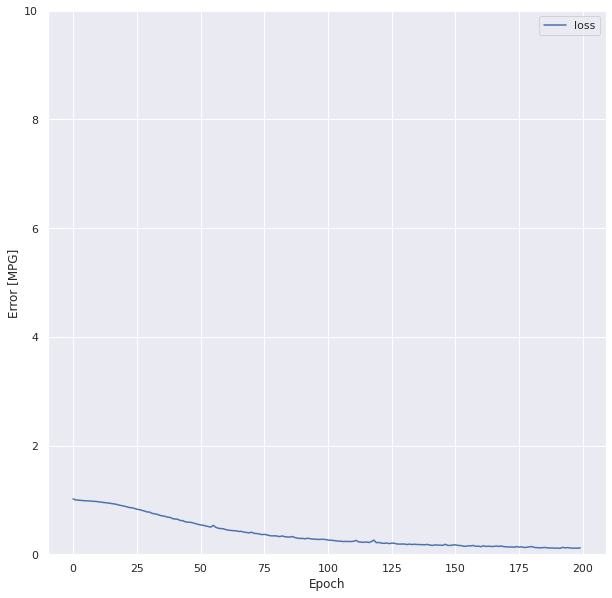

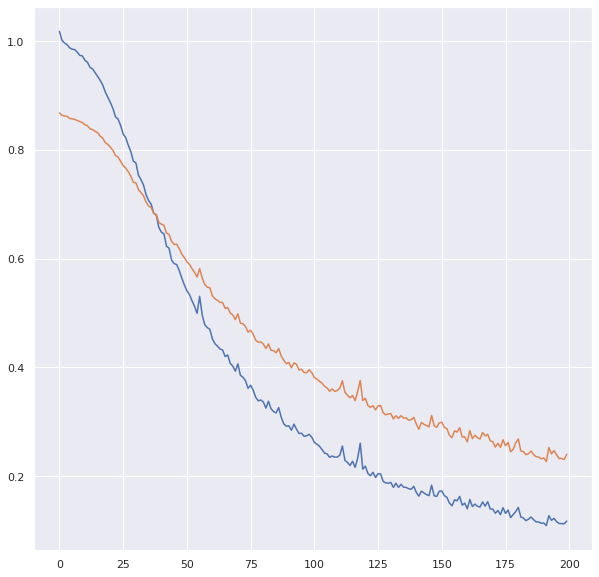

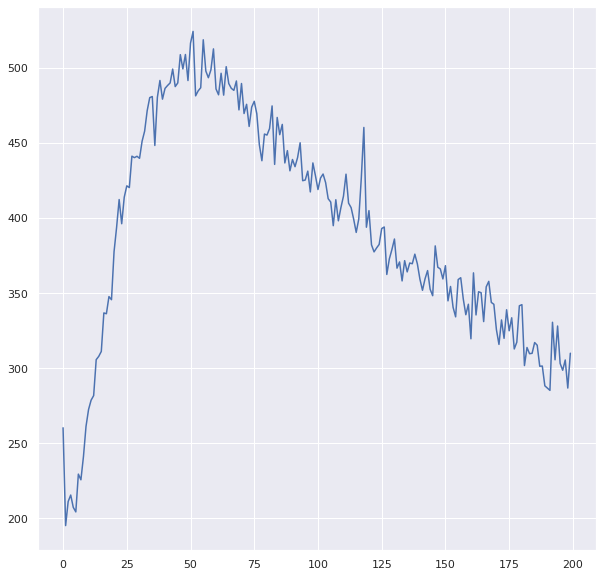

In [11]:
def build_model():
    model = keras.Sequential([
        layers.Dense(264, activation = "relu"),
        layers.Dense(264, activation = "relu"),
        layers.Dense(1)
    ])
    
    model.compile(loss = "mean_squared_error",
                  optimizer = tf.keras.optimizers.Adam(amsgrad = True), 
                  #optimizer = tfa.optimizers.RectifiedAdam(0.0001, amsgrad = True),
                  metrics = ["mse","mae","mape"])
    return model

def plot_loss(history, ylim):
  plt.plot(history.history['loss'], label='loss')
  #plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, ylim])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

dnn_model = build_model()
history = dnn_model.fit(np.array(features_train), np.array(target_train), verbose = 2, epochs = 200, shuffle = len(features_train))
results = dnn_model.evaluate(features_valid, target_valid, batch_size = len(features_valid))
print(results)
plot_loss(history, 10)
plt.show()
plt.plot(history.history["mse"])
plt.plot(history.history["mae"])
plt.show()
plt.plot(history.history["mape"])
plt.show()

In [12]:
#Add missing values to table and merge tables
data_train = features_train.join(target_train).reset_index(drop = True)
data_valid = features_valid.join(target_valid).reset_index(drop = True)
data2 = pd.concat([data_train] + [data_valid]).reset_index(drop = True)
data_nan2["Tenure"] = dnn_model.predict(features_nan).flatten()
display(data_nan2)
data = pd.concat([data2, data_nan2]).reset_index(drop = True)
display(data)
data.info()

29/29 [==============================] - 0s 1ms/step


CreditScore       Age    Tenure   Balance  EstimatedSalary  \
0      -0.580168  0.035995 -1.414742 -1.206852         0.732762   
1      -0.994205 -0.066254  1.205601  0.432434        -0.147342   
2      -0.640759 -0.270752  1.359675  1.108809        -0.226380   
3       0.066134  0.240493 -1.239960  0.783952         1.151091   
4       0.944702 -0.373000 -0.738694  0.963037        -0.260365   
..           ...       ...       ...       ...              ...   
904     0.964899  0.240493  0.648977  1.812117         0.695353   
905    -1.297159  0.751738 -1.478497  0.144270         0.322805   
906    -1.711197 -0.475249  1.842799  0.657611         0.250730   
907     0.106528 -0.270752 -0.002910  0.756674        -0.041659   
908     1.449625 -1.088743 -0.432088  0.856582        -1.082392   

     NumOfProducts  HasCrCard  IsActiveMember  Exited  Geography_Germany  \
0                3          1               0       1                  0   
1                1          0               1       0                  1   
2                2          0               0       0                  1   
3                1          0               0       1                  1   
4                1          0               0       0                  1   
..             ...        ...             ...     ...                ...   
904              2          1               1       0                  1   
905              1          1               0       1                  0   
906              2          0               0       0                  0   
907              2          1               0       0                  0   
908              1          1               0       0                  0   

     Geography_Spain  Gender_Male  
0                  1            0  
1                  0            1  
2                  0            1  
3                  0            1  
4                  0            1  
..               ...          ...  
904                0            1  
905                0            0  
906                0            1  
907                0            1  
908                0            0  

[909 rows x 12 columns]

CreditScore       Age   Balance  EstimatedSalary  NumOfProducts  \
0       -1.037187  0.375163  0.937205        -1.635163              1   
1        0.297802 -0.096680 -1.233158        -0.590123              2   
2       -1.078582 -0.191049  0.307627         0.073185              2   
3       -1.130326 -1.040366 -1.233158         1.674643              2   
4       -0.478354  0.092057  0.420246        -1.069473              2   
...           ...       ...       ...              ...            ...   
9995     0.964899  0.240493  1.812117         0.695353              2   
9996    -1.297159  0.751738  0.144270         0.322805              1   
9997    -1.711197 -0.475249  0.657611         0.250730              2   
9998     0.106528 -0.270752  0.756674        -0.041659              2   
9999     1.449625 -1.088743  0.856582        -1.082392              1   

      HasCrCard  IsActiveMember  Exited  Geography_Germany  Geography_Spain  \
0             1               0       0                  1                0   
1             1               0       0                  0                0   
2             0               1       0                  1                0   
3             0               0       0                  0                1   
4             1               1       0                  0                0   
...         ...             ...     ...                ...              ...   
9995          1               1       0                  1                0   
9996          1               0       1                  0                0   
9997          0               0       0                  0                0   
9998          1               0       0                  0                0   
9999          1               0       0                  0                0   

      Gender_Male    Tenure  
0               0 -0.681448  
1               1 -0.681448  
2               1  1.384103  
3               1  1.039844  
4               1 -0.337189  
...           ...       ...  
9995            1  0.648977  
9996            0 -1.478497  
9997            1  1.842799  
9998            1 -0.002910  
9999            0 -0.432088  

[10000 rows x 12 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Balance            10000 non-null  float64
 3   EstimatedSalary    10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   Exited             10000 non-null  int64  
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Tenure             10000 non-null  float64
dtypes: float64(5), int64(4), uint8(3)
memory usage: 732.5 KB


# Conclusion


The neural network turned out to be the best of all, so we took it, predicted the values in the "Tenure" column, and combined the main table with the table of missing values.

In [13]:
#features_test = data_test.drop(["Exited"], axis = 1)
#target_test = data_test["Exited"]

#Get the training and validation sets
features = data.drop(["Exited"], axis = 1)
target = data["Exited"]
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.3, random_state = 12345)
print(features_train.shape, features_valid.shape, target_train.shape, target_valid.shape)
display(features_train)
features_train.info()

(7000, 11) (3000, 11) (7000,) (3000,)


CreditScore       Age   Balance  EstimatedSalary  NumOfProducts  \
9716    -0.458986 -0.781996 -1.206852        -1.589671              2   
224      1.788023 -0.662891  0.637700         0.139930              1   
589     -2.755080  0.847005  0.307291         0.639522              1   
7507     0.597916  1.224480 -1.233158         0.155321              1   
1457     1.632791 -0.474154 -1.233158         0.237584              1   
...           ...       ...       ...              ...            ...   
4478    -0.033358 -1.323471  1.707222        -1.005372              2   
4094    -0.612888  0.469531  1.008701        -0.665118              1   
3492     0.318500 -1.134734 -1.233158        -1.179660              1   
2177    -0.374867 -0.568523  1.270845        -0.742408              2   
4578    -1.068233 -1.417840  1.280315         0.426557              1   

      HasCrCard  IsActiveMember  Geography_Germany  Geography_Spain  \
9716          0               1                  0                0   
224           1               0                  0                0   
589           0               0                  0                1   
7507          1               0                  0                1   
1457          0               0                  0                0   
...         ...             ...                ...              ...   
4478          1               1                  0                1   
4094          1               0                  0                1   
3492          1               0                  0                0   
2177          1               1                  1                0   
4578          1               1                  0                0   

      Gender_Male    Tenure  
9716            1 -0.698942  
224             1  1.039844  
589             0  1.039844  
7507            0  0.695586  
1457            0 -1.369965  
...           ...       ...  
4478            1  0.007069  
4094            0 -0.681448  
3492            1 -0.681448  
2177            1 -0.681448  
4578            1  1.039844  

[7000 rows x 11 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9716 to 4578
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7000 non-null   float64
 1   Age                7000 non-null   float64
 2   Balance            7000 non-null   float64
 3   EstimatedSalary    7000 non-null   float64
 4   NumOfProducts      7000 non-null   int64  
 5   HasCrCard          7000 non-null   int64  
 6   IsActiveMember     7000 non-null   int64  
 7   Geography_Germany  7000 non-null   uint8  
 8   Geography_Spain    7000 non-null   uint8  
 9   Gender_Male        7000 non-null   uint8  
 10  Tenure             7000 non-null   float64
dtypes: float64(5), int64(3), uint8(3)
memory usage: 512.7 KB


# Investigation of the task

For the classification task, I took several models, including: KNN, SVC, RFC, CatBoost, XGBoost. Let's look at models without parameters in cross-validation, after which we will select the best of them and select hyperparameters for them.

To connect gpu:
Runtime(Top bar) -> change runtime -> GPU

IMPORTANT!!!

**I evaluate accuracy instead of f1_score for model selection, but after I select models and fit hyperparameters, I will evaluate the best models by f1_score**

In [14]:
!pip install xgboost
!pip install catboost
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
import catboost as cat
from sklearn.neighbors import KNeighborsClassifier as knn


knn_model = knn()
cat_model = cat.CatBoostClassifier(random_state = 12345, custom_loss = ["Accuracy", "F1"], eval_metric = "F1", 
                                  use_best_model = True, task_type = "GPU", verbose = True)
svc_model = SVC(random_state = 12345, kernel = "rbf")
rf_model = RandomForestClassifier(random_state = 12345)
xgb_model = xgb.XGBClassifier(random_state = 12345)


knn_model.fit(features_train, target_train)
cat_model.fit(features_train, target_train, eval_set = (features_valid, target_valid), early_stopping_rounds = 25, plot = False)
svc_model.fit(features_train, target_train)
rf_model.fit(features_train, target_train)
xgb_model.fit(features_train, target_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 
Learning rate set to 0.060352
0:	learn: 0.5317604	test: 0.5514223	best: 0.5514223 (0)	total: 83.1ms	remaining: 1m 22s
1:	learn: 0.5230627	test: 0.5406007	best: 0.5514223 (0)	total: 166ms	remaining: 1m 22s
2:	learn: 0.5121043	test: 0.5331834	best: 0.5514223 (0)	total: 207ms	remaining: 1m 8s
3:	learn: 0.5084112	test: 0.5271493	best: 0.5514223 (0)	total: 251ms	remaining: 1m 2s
4:	learn: 0.5198523	test: 0.5302013	best: 0.5514223 (0)	total: 326ms	remaining: 1m 4s
5:	learn: 0.5343026	test: 0.5402426	best: 0.5514223 (0)	total: 450ms	remaining: 1m 14s
6:	learn: 0.5182448	test: 0.5348315	best: 0.5514223 (0)	total: 567ms	remaining: 1m 20s
7:	learn: 0.5305378	test: 0.5436464	best: 0.5514223 (0)	total: 687ms	remaining: 1m 25s
8:	learn: 0.5254470	

XGBClassifier(random_state=12345)

CatBoost provides a handy "use_best_model" parameter, with which you can select the best model by metric value, so we will evaluate CatBoost apart from the rest, its result is 0.8723

In [15]:
#result_cat = model_selection.cross_val_score(cat_model, features_valid, target_valid, scoring = "accuracy", cv = 25)

result_knn = model_selection.cross_val_score(knn_model, features_valid, target_valid, scoring = "f1", cv = 25)

result_svc = model_selection.cross_val_score(svc_model, features_valid, target_valid, scoring = "f1", cv = 25)

result_rf = model_selection.cross_val_score(rf_model, features_valid, target_valid, scoring = "f1", cv = 25)

result_xgb = model_selection.cross_val_score(xgb_model, features_valid, target_valid, scoring = "f1", cv = 25)



#print("CatBoost", result_cat.mean())


print("KNN", result_knn.mean())
print("SVC:", result_svc.mean())
print("RandomForestClassifier:", result_rf.mean())
print("XGBoost:", result_xgb.mean())

KNN 0.441329280519674
SVC: 0.4918538721212757
RandomForestClassifier: 0.5757294479505459
XGBoost: 0.6074616370291137


As a result of cross-validation, I left 3 models for further testing: RFC, XGBoost, CatBoost

# Selection of hyperparameters

There were problems with gridsearch and randomizedsearch, so I had to turn to third-party libraries. But here, too, the problem of identical numbers befell me, who would have thought that models could infect others with their problems. I didn’t find a clear answer to this either, but it doesn’t matter, because RFC is too slow, and the small difference in the result is not worth it, and CatBoost is generally superior to RFC.

In [16]:
!pip install optuna
import optuna
#rf_model2 = RandomForestClassifier()
#rf_model2.fit(features_train, target_train)
def objective(trial):
    
    n_estimators = int(trial.suggest_int("n_estimators", 100, 1000))
    
    max_depth = int(trial.suggest_int("max_depth", 1, 250))

    min_samples_split = int(trial.suggest_int("min_samples_split", 2, 250))

    min_samples_leaf = int(trial.suggest_int("min_samples_leaf", 1, 250))

    max_leaf_nodes = int(trial.suggest_int("max_leaf_nodes", 2, 250))

    #max_samples = int(trial.suggest_int("max_samples", 1, 250))

    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 1, 250)
    
    classifier_obj = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split,
                                           min_samples_leaf = min_samples_leaf, max_leaf_nodes = max_leaf_nodes, #max_samples = max_samples,
                                           min_impurity_decrease = min_impurity_decrease, random_state = 12345)
    
    #score = model_selection.cross_val_score(classifier_obj, features_train, target_train, scoring = "accuracy", n_jobs = -1, cv = 3)
    
    classifier_obj.fit(features_train.to_numpy(), target_train.to_numpy())
    
    predict = classifier_obj.predict(features_valid.to_numpy())
    
    predict_labels = np.rint(predict)
    
    accuracy = accuracy_score(target_valid.to_numpy(), predict)#_labels)
    
    f1_scorie = f1_score(target_valid.to_numpy(), predict_labels)
    
    #accuracyi = score.mean()
    
    #return accuracy#, f1_scorie

    return f1_scorie

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 25)
print(study.best_trial)
#param_dist = {
#    "n_estimators" : n_estimators,
#    "max_depth" : max_depth,
#    "min_samples_split" : min_samples_split,
#    "min_samples_leaf" : min_samples_leaf,
#    "max_leaf_nodes" : max_leaf_nodes,
#    "max_samples" : max_samples,
#    "min_impurity_decrease" : min_impurity_decrease
#}

#rf = model_selection.RandomizedSearchCV(rf_model2, param_dist, n_iter = 250, n_jobs = -1, verbose = 0, random_state = 12345)
#rf.fit(features_train, target_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 36.1 MB/s 
     |████████████████████████████████| 81 kB 10.9 MB/s 
     |████████████████████████████████| 209 kB 57.4 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 
     |████████████████████████████████| 147 kB 75.6 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 112 kB 76.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=ea86e8e44910295c4dbf1329b893840c9384529506ea2fb8eba7130bd8e5cb3f
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


[I 2022-12-01 04:44:42,427] A new study created in memory with name: no-name-92e788d5-30ff-4327-ba35-b03ca68e0fe5
[I 2022-12-01 04:44:45,811] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 711, 'max_depth': 244, 'min_samples_split': 217, 'min_samples_leaf': 11, 'max_leaf_nodes': 168, 'min_impurity_decrease': 237.3570678081423}. Best is trial 0 with value: 0.0.
[I 2022-12-01 04:44:48,584] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 637, 'max_depth': 40, 'min_samples_split': 43, 'min_samples_leaf': 179, 'max_leaf_nodes': 77, 'min_impurity_decrease': 121.99731846407967}. Best is trial 0 with value: 0.0.
[I 2022-12-01 04:44:51,107] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 522, 'max_depth': 87, 'min_samples_split': 231, 'min_samples_leaf': 12, 'max_leaf_nodes': 119, 'min_impurity_decrease': 55.07966157411959}. Best is trial 0 with value: 0.0.
[I 2022-12-01 04:44:52,504] Trial 3 finished with value: 0.0 and parameters: {'n_est

FrozenTrial(number=0, values=[0.0], datetime_start=datetime.datetime(2022, 12, 1, 4, 44, 42, 434882), datetime_complete=datetime.datetime(2022, 12, 1, 4, 44, 45, 810608), params={'n_estimators': 711, 'max_depth': 244, 'min_samples_split': 217, 'min_samples_leaf': 11, 'max_leaf_nodes': 168, 'min_impurity_decrease': 237.3570678081423}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'max_depth': IntDistribution(high=250, log=False, low=1, step=1), 'min_samples_split': IntDistribution(high=250, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=250, log=False, low=1, step=1), 'max_leaf_nodes': IntDistribution(high=250, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=250.0, log=False, low=1.0, step=None)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)


In [17]:
model_rfc = RandomForestClassifier(n_estimators = 647, max_depth = 68, min_samples_split = 141, min_samples_leaf = 93,
                                  max_leaf_nodes = 49, min_impurity_decrease = 149.75, random_state = 12345)
model_rfc.fit(features_train, target_train)
score = model_selection.cross_val_score(model_rfc, features_valid, target_valid, scoring = "accuracy", n_jobs = -1, cv = 10)
print(score.mean())

0.798


In [18]:
def objective(trial):
    dtrain = xgb.DMatrix(features_train, label = target_train)
    dvalid = xgb.DMatrix(features_valid, label = target_valid)
    param = {
        "n_estimators" : trial.suggest_int("n_estimators", 100, 5000), #= [int(x) for x in np.linspace(start = 100, stop = 1000, num = 1000)]
        
        "max_depth" : trial.suggest_int("max_depth", 1, 550), #= [int(x) for x in np.linspace(start = 1, stop = 250, num = 250)]

        "learning_rate" : trial.suggest_float("learning_rate", 0.05, 5.5), #= [x for x in np.linspace(start = 0.05, stop = 1.5, num = 0.05)]

        "min_child_weight" : trial.suggest_int("min_child_weight", 1, 550), #= [int(x) for x in np.linspace(start = 1, stop = 250, num = 250)]

        "colsample_bytree" : trial.suggest_float("colsample_bytree", 0.1, 1), #= [x for x in np.linspace(start = 0.1, stop = 25, num = 0.1)]

        "subsample" : trial.suggest_float("subsample", 0.1, 1), #= [x for x in np.linspace(start = 0.1, stop = 25, num = 0.1)]

        "booster" : trial.suggest_categorical("booster", ["gbtree", "dart"]),

        "gamma" : trial.suggest_float("gamma", 0.1, 55), #= [x for x in np.linspace(start = 0.1, stop = 25, num = 0.1)]

        #"sampling_method" : trial.suggest_categorical("sampling_method", ["uniform", "gradient_based"]),

        "three_method" : trial.suggest_categorical("three_method", ["auto", "exact", "approx", "hist", "gpu_hist"]),
        
        "max_delta_step" : trial.suggest_float("max_delta_step", 1, 10),
        
        "lambda" : trial.suggest_float("lambda", 0, 1),
        
        "alpha" : trial.suggest_float("alpha", 0, 1),
        
        "grow_policy" : trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"]),
        
        "max_bin" : trial.suggest_int("max_bin", 256, 1000)
    }
    
    model = xgb.train(param, dtrain)
    predictions = model.predict(dvalid)
    pred_labels = np.rint(predictions)
    accuracy = accuracy_score(target_valid, pred_labels)
    f1_scorie = f1_score(target_valid, pred_labels, average = "micro")
    
    #return accuracy, f1_scorie

    return f1_scorie

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100, timeout = 600)
print(study.best_trial)

#param_dict = {
#    "n_estimators" : n_estimators,
#    "max_depth" : max_depth,
#    "learning_rate" : learning_rate,
#    "min_child_weight" : min_child_weight,
#    "colsample_bytree" : colsample_bytree,
#    "subsample" : subsample,
#    "booster" : booster,
#    "gamma" : gamma,
#    "sampling_method" : sampling_method,
#    "three_method" : three_method
#}

#xg = model_selection.RandomSearchCV(xgb_model, param_dict, n_iters = 200, n_jobs = -1, cv = 3, verbose = 1)
# xg.fit(features_train, target_train)

[I 2022-12-01 04:45:40,577] A new study created in memory with name: no-name-0d3e0d85-c8b1-4141-acfb-259d1d6f6b6b
[I 2022-12-01 04:45:40,664] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 4205, 'max_depth': 387, 'learning_rate': 3.6003704701852315, 'min_child_weight': 287, 'colsample_bytree': 0.6047958406665966, 'subsample': 0.4298730240301726, 'booster': 'dart', 'gamma': 23.540984816896465, 'three_method': 'approx', 'max_delta_step': 1.4023894793483174, 'lambda': 0.9289414507052391, 'alpha': 0.7873655821518032, 'grow_policy': 'lossguide', 'max_bin': 347}. Best is trial 0 with value: 0.0.
[I 2022-12-01 04:45:40,766] Trial 1 finished with value: 0.429 and parameters: {'n_estimators': 1981, 'max_depth': 328, 'learning_rate': 2.0967118810886634, 'min_child_weight': 405, 'colsample_bytree': 0.7044111184668937, 'subsample': 0.512619496942503, 'booster': 'dart', 'gamma': 10.193522893123015, 'three_method': 'hist', 'max_delta_step': 4.2935429707681045, 'lambda': 0.23728043

FrozenTrial(number=64, values=[0.8626666666666667], datetime_start=datetime.datetime(2022, 12, 1, 4, 45, 47, 379051), datetime_complete=datetime.datetime(2022, 12, 1, 4, 45, 47, 482423), params={'n_estimators': 2670, 'max_depth': 156, 'learning_rate': 0.24798007684289114, 'min_child_weight': 90, 'colsample_bytree': 0.7019509096838314, 'subsample': 0.49605821566447417, 'booster': 'gbtree', 'gamma': 2.1396097495279474, 'three_method': 'auto', 'max_delta_step': 6.402193357619202, 'lambda': 0.6393099523145053, 'alpha': 0.9281769129650099, 'grow_policy': 'depthwise', 'max_bin': 664}, distributions={'n_estimators': IntDistribution(high=5000, log=False, low=100, step=1), 'max_depth': IntDistribution(high=550, log=False, low=1, step=1), 'learning_rate': FloatDistribution(high=5.5, log=False, low=0.05, step=None), 'min_child_weight': IntDistribution(high=550, log=False, low=1, step=1), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.1, step=None), 'subsample': FloatDistribution

An increase of 1.5 percent accuracy! Let's save the model with the best parameters in the xgb_model2 variable.

In [19]:
xgb_model2 = xgb.XGBClassifier(n_estimators = 836, max_depth = 340, learning_rate = 0.411, min_child_weight = 139, 
                              colsample_bytree = 0.9317, subsample = 0.926, booster = "gbtree", gamma = 0.1034, 
                              three_method = "hist", max_delta_step = 1.711, alpha = 0.0031, 
                              grow_policy = "lossguide", max_bin = 317)

xgb_model2.fit(features_train, target_train)

XGBClassifier(alpha=0.0031, colsample_bytree=0.9317, gamma=0.1034,
              grow_policy='lossguide', learning_rate=0.411, max_bin=317,
              max_delta_step=1.711, max_depth=340, min_child_weight=139,
              n_estimators=836, subsample=0.926, three_method='hist')

CatBoost has a built-in cross-validation, let's use it.

In [20]:
cat_model2 = cat.CatBoostClassifier(random_state = 12345, custom_loss = ["Accuracy", "F1"], eval_metric = "F1")
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 1000)]
learning_rate = [x for x in np.arange(0.1, 1, 0.1)]
depth = [int(x) for x in np.linspace(start = 1, stop = 16, num = 16)]
grow_policy = ["SymmetricTree", "Depthwise", "Lossguide"]
min_child_samples = [int(x) for x in np.linspace(start = 1, stop = 250, num = 250)]
leb = ["AnyImprovement", "Armijo"]
score_function = ["Cosine", "L2"]
l2_leaf_reg = [x for x in np.linspace(start = 1, stop = 250, num = 245)]
border_count = [int(x) for x in np.linspace(start = 1, stop = 255, num = 255)]
ctr_target_border_count = [int(x) for x in np.linspace(start = 1, stop = 255, num = 255)]
loss_function = ["LogLoss", "CrossEntropy"]
subsample = [x for x in np.arange(0.1, 1, 0.1)]
lei = [int(x) for x in np.linspace(start = 1, stop = 200, num = 200)]
bootstrap_type = ["Bayesian", "Bernoulli", "MVS", "Poisson"]
bag_temp = [x for x in np.linspace(start = 1, stop = 200.5, num = 195)]
sampling_frequency = ["PerTree", "PerTreeLevel"]
sampling_unit = ["Object", "Group"]
max_leaves = [int(x) for x in np.linspace(start = 1, stop = 64, num = 64)]
lem = ["Newton", "Gradient", "Exact"]
boosting_type = ["Ordered", "Plain"]
boost_to_average = [True, False]
langevin = [True, False]
grid = {
    "n_estimators" : n_estimators,
    "learning_rate" : learning_rate,
    "depth" : depth,
    "grow_policy" : grow_policy,
    "min_child_samples" : min_child_samples,
    "leaf_estimation_backtracking" : leb,
    #"score_function" : score_function,
    #"l2_leaf_reg" : l2_leaf_reg,
    #"border_count" : border_count,
    #"ctr_target_border_count" : ctr_target_border_count,
    #"subsample" : subsample,
    #"leaf_estimation_iterations" : lei,
    #"bootstrap_type" : bootstrap_type,
    #"bagging_temperature" : bag_temp,
    #"sampling_frequency" : sampling_frequency,
    #"sampling_unit" : sampling_unit,
    #"max_leaves" : max_leaves,
    #"leaf_estimation_method" : lem,
    #"boosting_type" : boosting_type,
    #"boost_from_average" : boost_to_average,
    #"langevin" : langevin,
    #"loss_function" : loss_function
}

grid_search = cat_model2.randomized_search(grid, features_train, target_train, n_iter = 50, cv = 3, plot = True, verbose = True)
#cat_model3 = cat.CatBoostClassifier(iterations = 500, depth = 6, learning_rate = 0.1, custom_loss = ["Accuracy", "F1"], 
                                   #eval_metric = "Accuracy", verbose = True, use_best_model = True, task_type = "GPU")
#cat_model3.fit(features_train, target_train, eval_set = (features_valid, target_valid), early_stopping_rounds = 50, plot = False)
#score = model_selection.cross_val_score(cat_model3, features_valid, target_valid, scoring = "accuracy", cv = 10)
#print(score.mean())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
426:	learn: 0.8808630	test: 0.5654649	best: 0.6469428 (90)	total: 1.25s	remaining: 1.64s
427:	learn: 0.8823254	test: 0.5681818	best: 0.6469428 (90)	total: 1.25s	remaining: 1.63s
428:	learn: 0.8832630	test: 0.5665399	best: 0.6469428 (90)	total: 1.25s	remaining: 1.63s
429:	learn: 0.8837863	test: 0.5665399	best: 0.6469428 (90)	total: 1.25s	remaining: 1.63s
430:	learn: 0.8842007	test: 0.5654649	best: 0.6469428 (90)	total: 1.26s	remaining: 1.62s
431:	learn: 0.8851383	test: 0.5600000	best: 0.6469428 (90)	total: 1.26s	remaining: 1.62s
432:	learn: 0.8877456	test: 0.5648855	best: 0.6469428 (90)	total: 1.26s	remaining: 1.62s
433:	learn: 0.8886810	test: 0.5648855	best: 0.6469428 (90)	total: 1.26s	remaining: 1.61s
434:	learn: 0.8896165	test: 0.5627376	best: 0.6469428 (90)	total: 1.27s	remaining: 1.61s
435:	learn: 0.8894096	test: 0.5606061	best: 0.6469428 (90)	total: 1.27s	remaining: 1.61s
436:	learn: 0.8885768	test: 0.5616698	best

I collected so many hyperparameters that CatBoost refused to sort them out) Some of the "subsample" type negatively affected the result, some neutrally, but in the end, those that I did not comment out in the dictionary are best for our task.
We got an accuracy of a little more than 90 percent, improved the default result. Additionally, we derive the parameters of the best model and summarize all the results in a table (next cell).

In [21]:
#Summarize the results in a table, sorting by model accuracy and deleting unnecessary columns
print(grid_search["params"])
xg_df = pd.DataFrame(grid_search["cv_results"]).sort_values("test-Accuracy-mean", ascending = False).reset_index(drop = True)
#xg_df = xg_df.drop([
#    "mean_fit_time",
#    "std_fit_time",
#    "mean_score_time",
#    "std_score_time",
#    "params",
#    "split0_test_score",
#    "split1_test_score",
#    "split2_test_score",
#    "std_test_score"],
#    axis = 1)
xg_df.head(10)

{'min_data_in_leaf': 217, 'depth': 11, 'iterations': 778, 'learning_rate': 0.1, 'grow_policy': 'Depthwise', 'leaf_estimation_backtracking': 'AnyImprovement'}


iterations  test-F1-mean  test-F1-std  train-F1-mean  train-F1-std  \
0          81      0.594333     0.011192       0.714607      0.004727   
1          79      0.594364     0.009354       0.710516      0.010326   
2          73      0.592755     0.011040       0.698374      0.007388   
3          74      0.593122     0.008483       0.699877      0.007813   
4          76      0.593739     0.011064       0.703844      0.007714   
5          71      0.592422     0.008577       0.692431      0.001955   
6          69      0.591010     0.008863       0.687748      0.001576   
7          72      0.592255     0.011375       0.694613      0.005898   
8          82      0.594340     0.009829       0.715044      0.004456   
9          80      0.593588     0.009799       0.711359      0.007362   

   test-Logloss-mean  test-Logloss-std  train-Logloss-mean  train-Logloss-std  \
0           0.340207          0.010029            0.240607           0.002851   
1           0.340027          0.010055            0.243255           0.002569   
2           0.339715          0.009932            0.250084           0.002196   
3           0.339895          0.010032            0.249091           0.002553   
4           0.339919          0.010307            0.247124           0.002143   
5           0.339421          0.009898            0.252501           0.001757   
6           0.339128          0.009533            0.254347           0.001837   
7           0.339569          0.009866            0.251311           0.001995   
8           0.340309          0.009865            0.239536           0.002906   
9           0.340265          0.010182            0.241929           0.002556   

   test-Accuracy-mean  test-Accuracy-std  train-Accuracy-mean  \
0            0.862144           0.005546             0.901643   
1            0.862144           0.005118             0.900428   
2            0.862001           0.005589             0.896857   
3            0.862001           0.005541             0.897286   
4            0.862001           0.005164             0.898429   
5            0.861858           0.004282             0.894857   
6            0.861858           0.003857             0.893500   
7            0.861715           0.005626             0.895500   
8            0.861715           0.006521             0.901857   
9            0.861715           0.005118             0.900714   

   train-Accuracy-std  
0            0.001491  
1            0.003106  
2            0.001738  
3            0.001928  
4            0.002071  
5            0.000482  
6            0.000749  
7            0.001424  
8            0.001138  
9            0.002150

In [22]:
cat_model3 = cat.CatBoostClassifier(iterations = 430, min_data_in_leaf = 45, 
                                    depth = 5, learning_rate = 0.2, 
                                    custom_loss = ["Accuracy", "F1"], grow_policy = "Depthwise", 
                                    leaf_estimation_backtracking = "AnyImprovement", 
                                   eval_metric = "F1", verbose = True, use_best_model = True, task_type = "GPU")
cat_model3.fit(features_train, target_train, eval_set = (features_valid, target_valid), early_stopping_rounds = 50, 
               plot = False)

0:	learn: 0.5748553	test: 0.6051081	best: 0.6051081 (0)	total: 13.8ms	remaining: 5.93s
1:	learn: 0.5405405	test: 0.5320088	best: 0.6051081 (0)	total: 26ms	remaining: 5.57s
2:	learn: 0.5619530	test: 0.5532382	best: 0.6051081 (0)	total: 37.8ms	remaining: 5.37s
3:	learn: 0.5664368	test: 0.5576290	best: 0.6051081 (0)	total: 49.8ms	remaining: 5.3s
4:	learn: 0.5677419	test: 0.5540839	best: 0.6051081 (0)	total: 61.5ms	remaining: 5.22s
5:	learn: 0.5653580	test: 0.5482797	best: 0.6051081 (0)	total: 73.3ms	remaining: 5.18s
6:	learn: 0.5673432	test: 0.5553097	best: 0.6051081 (0)	total: 84.6ms	remaining: 5.11s
7:	learn: 0.5693092	test: 0.5413870	best: 0.6051081 (0)	total: 99.5ms	remaining: 5.25s
8:	learn: 0.5739291	test: 0.5460599	best: 0.6051081 (0)	total: 111ms	remaining: 5.18s
9:	learn: 0.5753804	test: 0.5476718	best: 0.6051081 (0)	total: 123ms	remaining: 5.15s
10:	learn: 0.5748503	test: 0.5511111	best: 0.6051081 (0)	total: 134ms	remaining: 5.09s
11:	learn: 0.5797897	test: 0.5614035	best: 0.605

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
predict_cat = cat_model3.predict(features_valid)
predict_xgb = xgb_model2.predict(features_valid)
print("CatBoost F1 score:", f1_score(target_valid, predict_cat))
print("ROC-AUC:", roc_auc_score(target_valid, predict_cat))
print("Conufusion_matrix:", confusion_matrix(target_valid, predict_cat))
print("XGBoost F1 score:", f1_score(target_valid, predict_xgb))
print("ROC-AUC:", roc_auc_score(target_valid, predict_xgb))
print("Confusion_matrix:", confusion_matrix(target_valid, predict_xgb))

CatBoost F1 score: 0.6051080550098232
ROC-AUC: 0.7324044434518641
Conufusion_matrix: [[2290  104]
 [ 298  308]]
XGBoost F1 score: 0.4713375796178344
ROC-AUC: 0.6593587930221593
Confusion_matrix: [[2280  114]
 [ 384  222]]


90 percent accuracy and only 81-82 percent f1 and over 400 mispredicted labels for each class. We will fight class imbalance)

# Fighting imbalance

In [24]:
import plotly.express as px
print(target.value_counts())
target_zeros = data[data["Exited"] == 0]["Exited"].count()
target_ones = data[data["Exited"] == 1]["Exited"].count()
print(target_zeros)
fig = px.histogram(data, "Exited")
fig.show(renderer = "colab")
#sns.countplot(data, x = "Exited")
#plt.show()

0    7963
1    2037
Name: Exited, dtype: int64
7963


Let's get rid of the imbalance of classes with the upsample technique and the downsample technique.

In [25]:
from sklearn.utils import shuffle

features = data.drop(["Exited"], axis = 1)
target = data["Exited"]

def upsample(features, target, repeat, boolen):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if boolen == True:
        
        features_upsample = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsample = pd.concat([target_zeros] + [target_ones] * repeat)
    
        features_upsample, target_upsample = shuffle(features_upsample, target_upsample, random_state = 12345)
    
        return features_upsample, target_upsample

    else:
        
        features_upsample = pd.concat([features_zeros.sample(frac = repeat, random_state = 12345)] + [features_ones])
        target_upsample = pd.concat([target_zeros.sample(frac = repeat, random_state = 12345)] + [target_ones])
        
        features_downsample, target_downsample = shuffle(features_upsample, target_upsample, random_state = 12345)
        
        return features_downsample, target_downsample
    
features_upsample, target_upsample = upsample(features, target, 4, True)
features_downsample, target_downsample = upsample(features, target, 0.25, False)

print(target_downsample[target_downsample == 0].count())


#predict_cat = cat_model3.predict(features_valid)
#print("F1 score:", f1_score(target_valid, predict_cat))

1991


Let's look at the heat map of the correlation and distribution of the new table.

P.S actually this cell was needed for resampling, but as I said GaussianMixture works too long (I left it overnight and then gave it another 3 hours, but even after that it still did not finish its work).

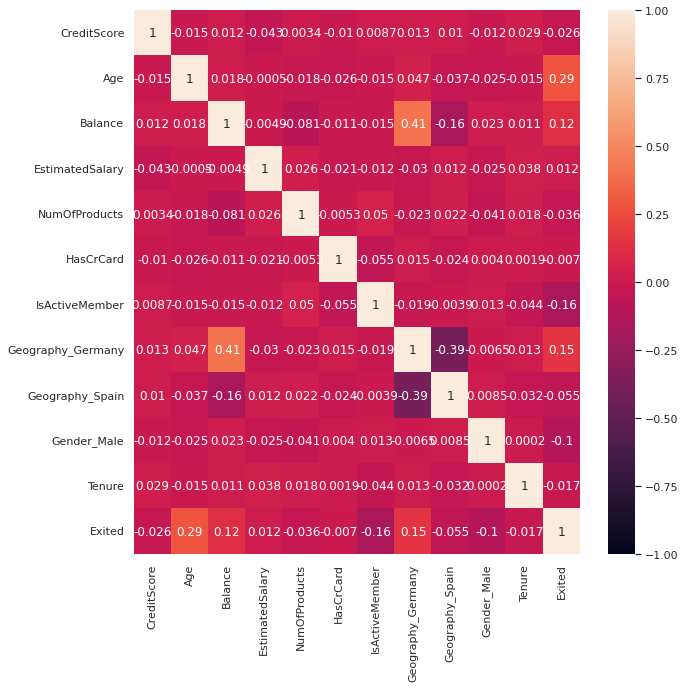

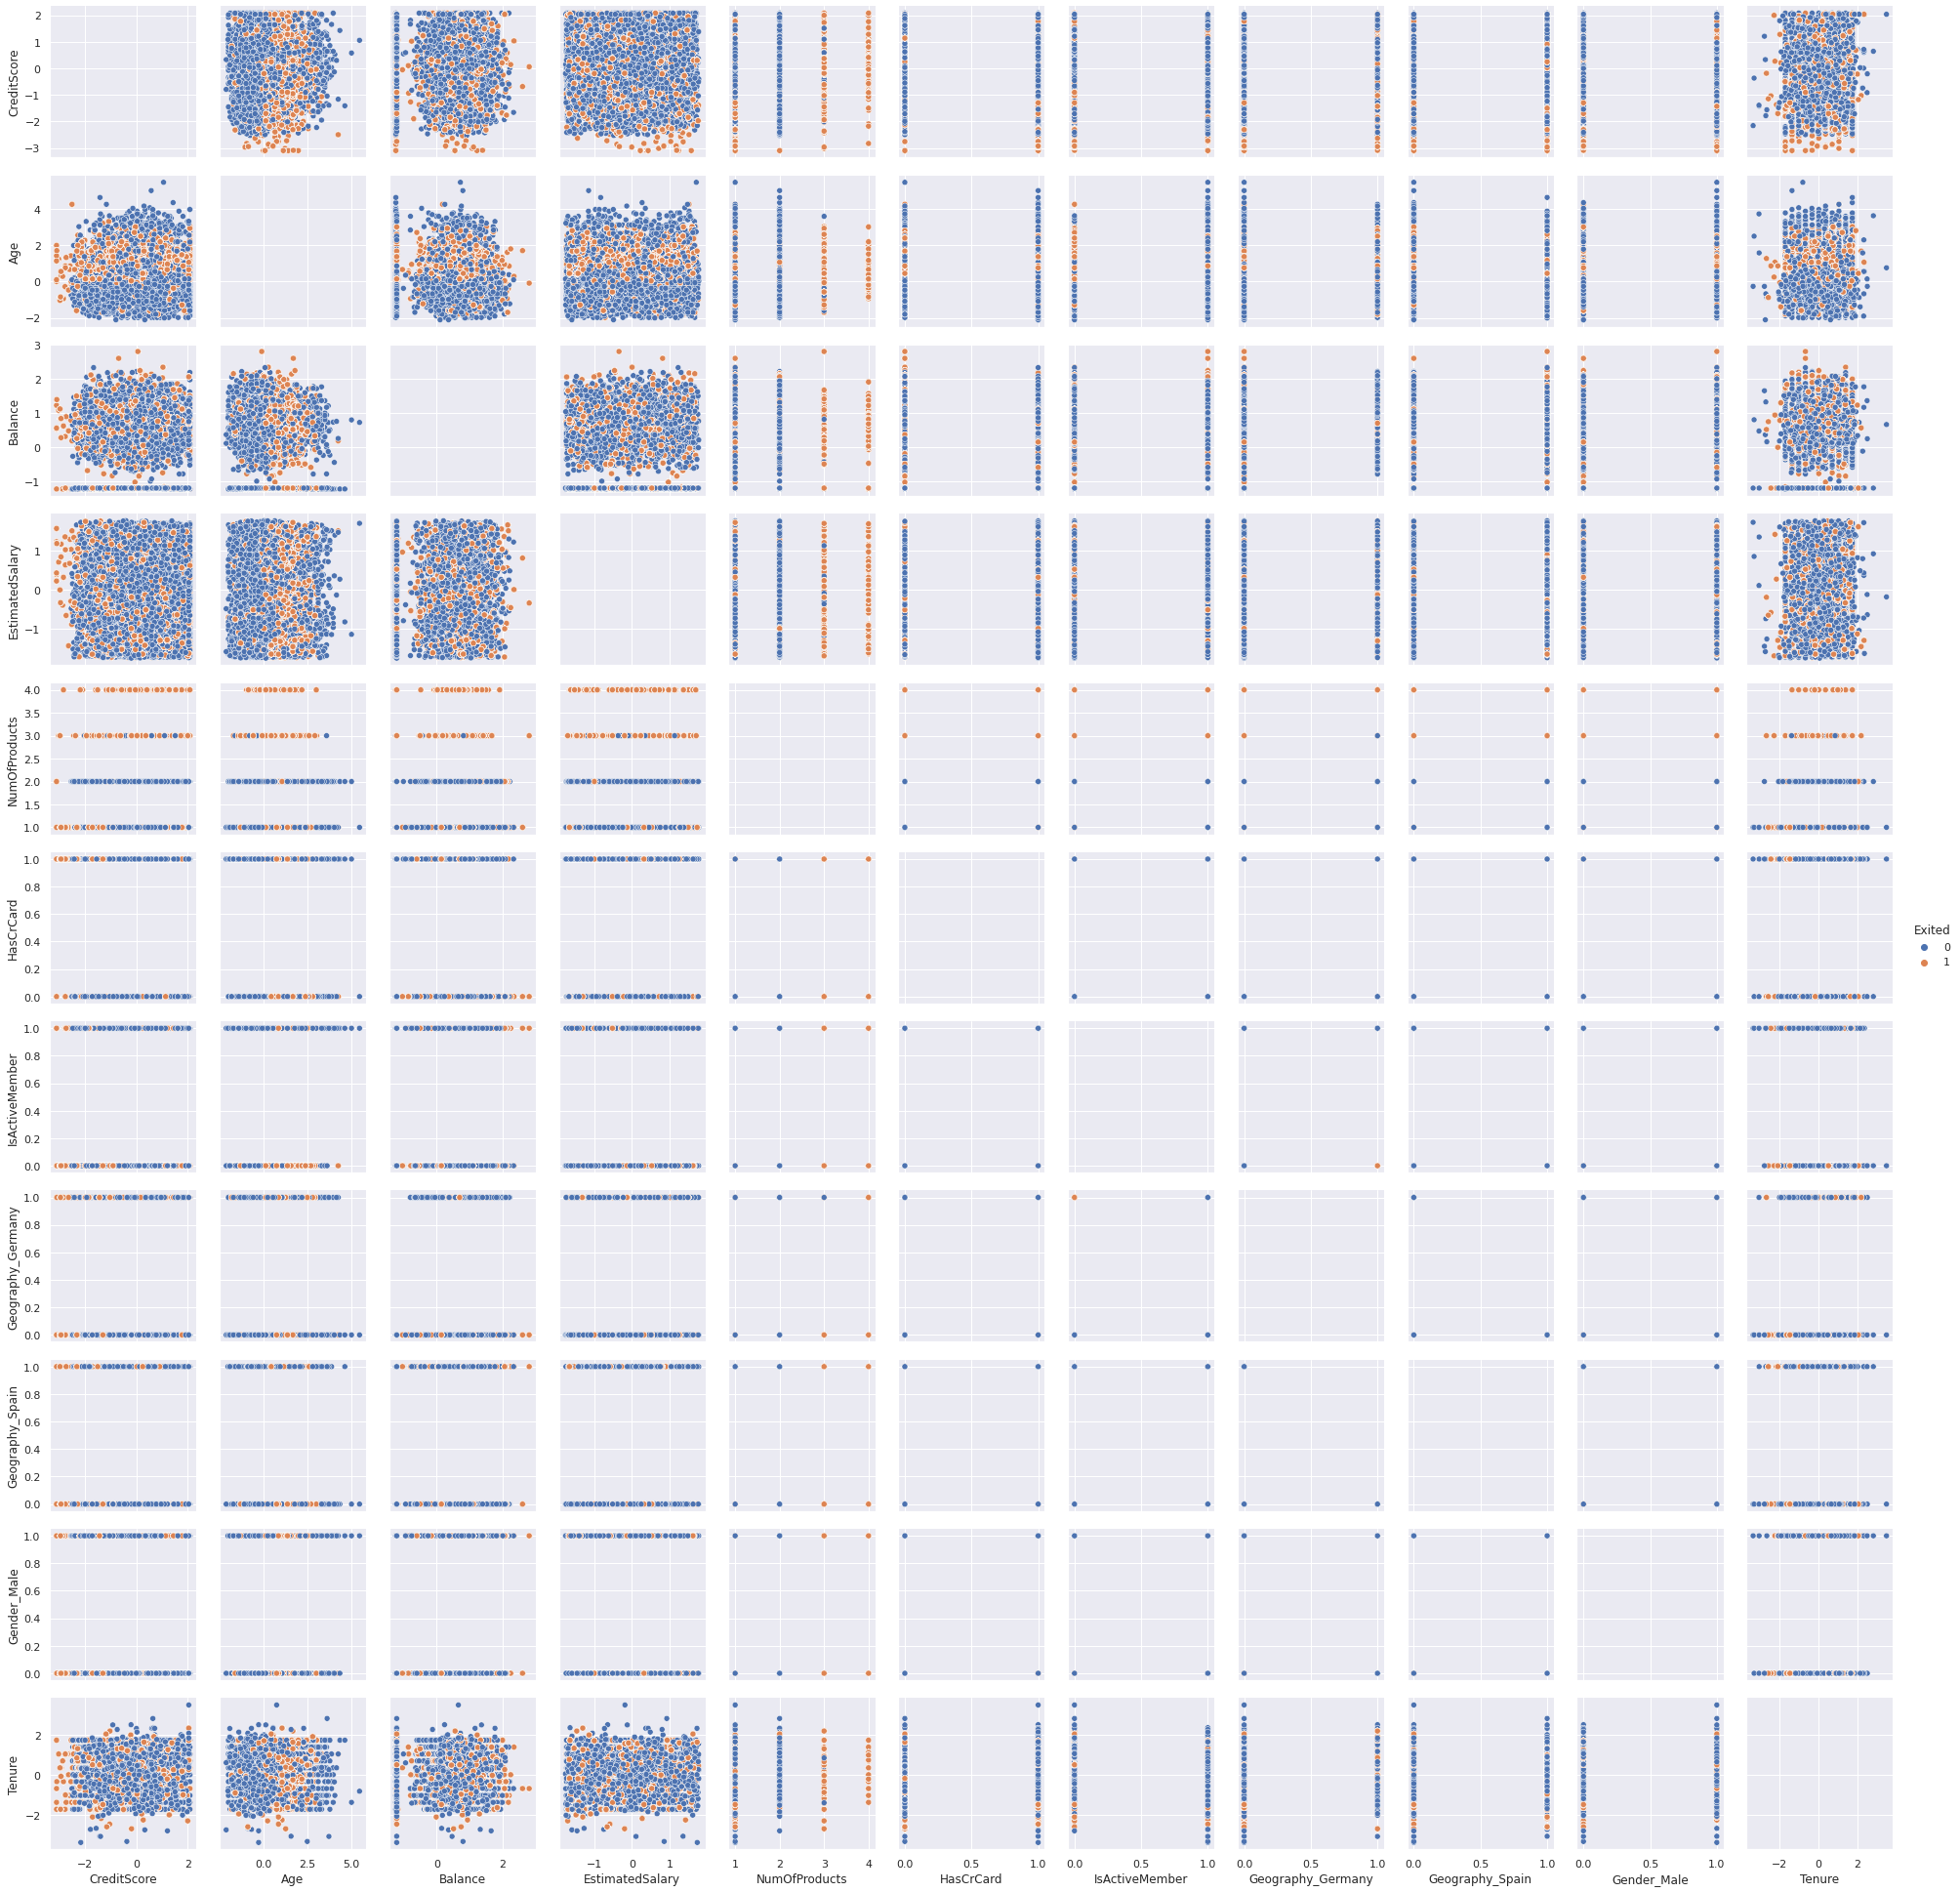

In [26]:
from sklearn.decomposition import PCA
from sklearn import mixture as mx
data2 = features_upsample.join(target_upsample)
pca = PCA(n_components = 5)
components = pd.DataFrame(pca.fit_transform(data2[data.columns[1:-1]]))
components["Exited"] = data2["Exited"].reset_index(drop = True)
ax = sns.heatmap(data2.corr(), vmin = -1, vmax = 1, annot = True)
sns.set(rc = {"figure.figsize" : (10, 10)})
plt.show()
#data2_x = data2.copy()
#data2_x = data2_x[data2_x.columns[1:]]
#gmm = mx.GaussianMixture(n_components = 25, covariance_type = "full").fit(data2_x)
#generated = gmm.sample(10000)
#gen = pd.DataFrame(generated[0])
#gen.rename(columns = {gen.columns[-1] : "Exited"}, inplace = True)
#gen.loc[gen["Exited"] >= 0.5, "Exited"] == 1
#gen.loc[gen["Exited"] < 0.5, "Exited"] == 0
g = sns.PairGrid(data2, hue = "Exited")
#g.map_diag()
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

In [27]:
#Divide the new table into training and validation sets

#Delay the test sample
#features_test = features_upsample.tail(1000)
#features_upsample = features_upsample.head(14514)
#target_test = target_upsample.tail(1000)
#target_upsample = target_upsample.head(14514)

features_train, features_valid, target_train, target_valid = model_selection.train_test_split(features, target, 
                                                                                             test_size = 0.3, random_state = 12345)
#Delay the test sample
features_test = features_train.tail(1000)
features_train = features_train.head(6000)
target_test = target_train.tail(1000)
target_train = target_train.head(6000)

#Let's check which unbalance bobba technique is best for our data, for this we apply both techniques and check them later
features_train_upsample, target_train_upsample = upsample(features_train, target_train, 4, True)
features_train_downsample, target_train_downsample = upsample(features_train, target_train, 0.25, False)

print(features_train_upsample.shape, features_train_downsample.shape)

print(target_train_upsample[target_train_upsample == 1].count())
print(target_train_downsample[target_train_downsample == 1].count())

print(features_train.shape, features_valid.shape, target_train.shape, target_valid.shape)

(9753, 11) (2438, 11)
5004
1251
(6000, 11) (3000, 11) (6000,) (3000,)


# Downsample

In [28]:
#xgb_model2 = xgb.XGBClassifier(random_state = 12345)
cat_model3 = cat.CatBoostClassifier(iterations = 614, min_data_in_leaf = 73, depth = 11, learning_rate = 0.3, 
                                    custom_loss = ["Accuracy", "F1"], grow_policy = "SymmetricTree", 
                                    leaf_estimation_backtracking = "AnyImprovement", 
                                   eval_metric = "F1", verbose = True, use_best_model = True, task_type = "GPU")

#cat_model4 = cat.CatBoostClassifier()

cat_model3.fit(features_train_downsample, target_train_downsample, eval_set = (features_valid, target_valid), early_stopping_rounds = 50, 
               plot = False)
xgb_model2.fit(features_train_downsample, target_train_downsample)

predict_xgb = xgb_model2.predict(features_valid)
predict_cat = cat_model3.predict(features_valid)

print("Accuracy xgb:", accuracy_score(target_valid, predict_xgb))
print("Accuracy cat:", accuracy_score(target_valid, predict_cat))
print("F1 score xgb:", f1_score(target_valid, predict_xgb))
print("F1 score cat:", f1_score(target_valid, predict_cat))
print("AUC-ROC xgb:", roc_auc_score(target_valid, predict_xgb))
print("AUC-ROC cat:", roc_auc_score(target_valid, predict_cat))
print("Confusion matrix xgb:", confusion_matrix(target_valid, predict_xgb))
print("Confusion matrix cat:", confusion_matrix(target_valid, predict_cat))

0:	learn: 0.7666808	test: 0.5760214	best: 0.5760214 (0)	total: 174ms	remaining: 1m 46s
1:	learn: 0.7852512	test: 0.5726444	best: 0.5760214 (0)	total: 218ms	remaining: 1m 6s
2:	learn: 0.7840395	test: 0.5804416	best: 0.5804416 (2)	total: 528ms	remaining: 1m 47s
3:	learn: 0.7860985	test: 0.5870263	best: 0.5870263 (3)	total: 602ms	remaining: 1m 31s
4:	learn: 0.7880524	test: 0.5714286	best: 0.5870263 (3)	total: 632ms	remaining: 1m 17s
5:	learn: 0.8089796	test: 0.5933375	best: 0.5933375 (5)	total: 1.09s	remaining: 1m 50s
6:	learn: 0.8101059	test: 0.5926388	best: 0.5933375 (5)	total: 1.12s	remaining: 1m 36s
7:	learn: 0.8084933	test: 0.5929648	best: 0.5933375 (5)	total: 1.13s	remaining: 1m 25s
8:	learn: 0.8125766	test: 0.5934755	best: 0.5934755 (8)	total: 1.58s	remaining: 1m 46s
9:	learn: 0.8164763	test: 0.5925926	best: 0.5934755 (8)	total: 1.83s	remaining: 1m 50s
10:	learn: 0.8146341	test: 0.5929648	best: 0.5934755 (8)	total: 1.84s	remaining: 1m 41s
11:	learn: 0.8144833	test: 0.5964691	best: 

# Upsample

In [29]:
#xgb_model2 = xgb.XGBClassifier(random_state = 12345)
cat_model3 = cat.CatBoostClassifier(iterations = 614, min_data_in_leaf = 73, depth = 11, learning_rate = 0.3, 
                                    custom_loss = ["Accuracy", "F1"], grow_policy = "SymmetricTree", 
                                    leaf_estimation_backtracking = "AnyImprovement", 
                                   eval_metric = "Accuracy", verbose = True, use_best_model = True, task_type = "GPU")

#cat_model4 = cat.CatBoostClassifier()

cat_model3.fit(features_train_upsample, target_train_upsample, eval_set = (features_valid, target_valid), early_stopping_rounds = 50, 
               plot = False)
xgb_model2.fit(features_train_upsample, target_train_upsample)

predict_xgb = xgb_model2.predict(features_valid)
predict_cat = cat_model3.predict(features_valid)

print("Accuracy xgb:", accuracy_score(target_valid, predict_xgb))
print("Accuracy cat:", accuracy_score(target_valid, predict_cat))
print("F1 score xgb:", f1_score(target_valid, predict_xgb))
print("F1 score cat:", f1_score(target_valid, predict_cat))
print("AUC-ROC xgb:", roc_auc_score(target_valid, predict_xgb))
print("AUC-ROC cat:", roc_auc_score(target_valid, predict_cat))
print("Confusion matrix xgb:", confusion_matrix(target_valid, predict_xgb))
print("Confusion matrix cat:", confusion_matrix(target_valid, predict_cat))

0:	learn: 0.7719676	test: 0.7703333	best: 0.7703333 (0)	total: 86.4ms	remaining: 53s
1:	learn: 0.7835538	test: 0.7706667	best: 0.7706667 (1)	total: 239ms	remaining: 1m 13s
2:	learn: 0.7938070	test: 0.7833333	best: 0.7833333 (2)	total: 526ms	remaining: 1m 47s
3:	learn: 0.7929868	test: 0.7800000	best: 0.7833333 (2)	total: 621ms	remaining: 1m 34s
4:	learn: 0.7977033	test: 0.7870000	best: 0.7870000 (4)	total: 718ms	remaining: 1m 27s
5:	learn: 0.8040603	test: 0.7886667	best: 0.7886667 (5)	total: 874ms	remaining: 1m 28s
6:	learn: 0.8052907	test: 0.7900000	best: 0.7900000 (6)	total: 907ms	remaining: 1m 18s
7:	learn: 0.8075464	test: 0.7896667	best: 0.7900000 (6)	total: 1.06s	remaining: 1m 20s
8:	learn: 0.8102122	test: 0.7940000	best: 0.7940000 (8)	total: 1.57s	remaining: 1m 45s
9:	learn: 0.8191326	test: 0.7900000	best: 0.7940000 (8)	total: 2.09s	remaining: 2m 6s
10:	learn: 0.8248744	test: 0.7940000	best: 0.7940000 (8)	total: 2.62s	remaining: 2m 23s
11:	learn: 0.8313339	test: 0.7943333	best: 0.

# Upsample

Epoch 1/100
378/378 - 2s - loss: 0.5470 - accuracy: 0.7198 - val_loss: 0.5013 - val_accuracy: 0.7612 - 2s/epoch - 5ms/step
Epoch 2/100
378/378 - 1s - loss: 0.4786 - accuracy: 0.7653 - val_loss: 0.4663 - val_accuracy: 0.7771 - 1s/epoch - 3ms/step
Epoch 3/100
378/378 - 1s - loss: 0.4508 - accuracy: 0.7852 - val_loss: 0.4510 - val_accuracy: 0.7805 - 1s/epoch - 3ms/step
Epoch 4/100
378/378 - 1s - loss: 0.4364 - accuracy: 0.7914 - val_loss: 0.4410 - val_accuracy: 0.7944 - 1s/epoch - 3ms/step
Epoch 5/100
378/378 - 1s - loss: 0.4243 - accuracy: 0.7985 - val_loss: 0.4416 - val_accuracy: 0.7942 - 1s/epoch - 3ms/step
Epoch 6/100
378/378 - 1s - loss: 0.4140 - accuracy: 0.8056 - val_loss: 0.4376 - val_accuracy: 0.8006 - 1s/epoch - 3ms/step
Epoch 7/100
378/378 - 1s - loss: 0.4066 - accuracy: 0.8122 - val_loss: 0.4256 - val_accuracy: 0.8054 - 1s/epoch - 3ms/step
Epoch 8/100
378/378 - 1s - loss: 0.3925 - accuracy: 0.8200 - val_loss: 0.4183 - val_accuracy: 0.8096 - 1s/epoch - 3ms/step
Epoch 9/100
378/

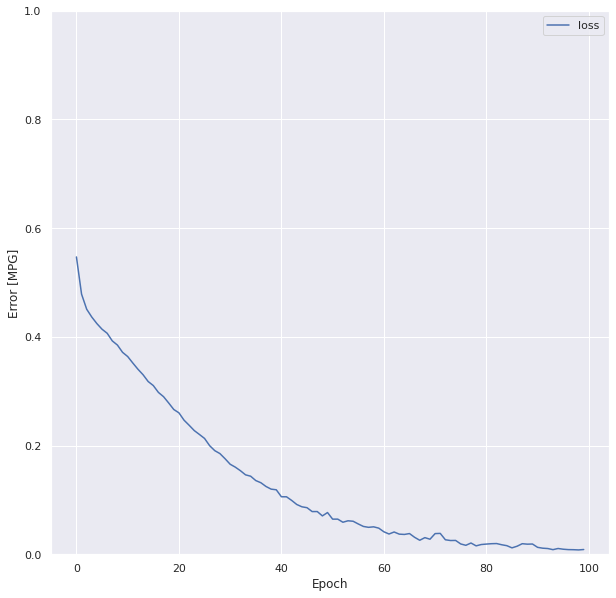

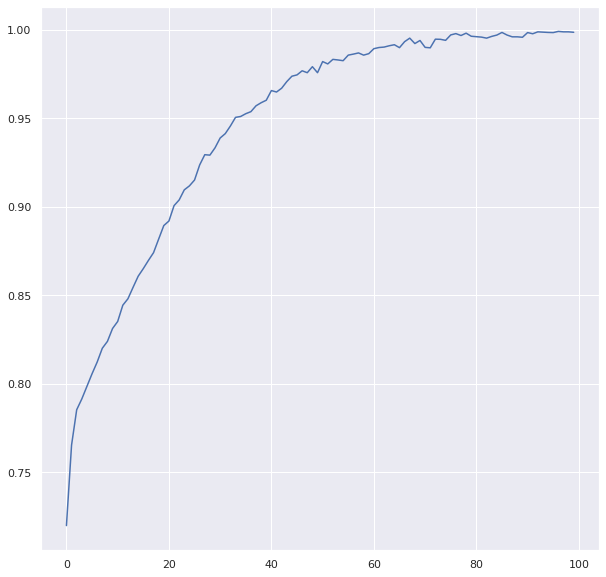

In [30]:
import tensorflow_addons as tfa
def build_model2():
    model = keras.Sequential([
        layers.Dense(264, activation = "relu"),
        layers.Dense(264, activation = "relu"),
        layers.Dense(1, activation = "sigmoid")
    ])
    
    model.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(amsgrad = True),
                  #optimizer = tf.keras.optimizers.RMSprop(0.0001),
                  metrics = ["accuracy"])
    return model

dnn_model_upsample = build_model2()
history2 = dnn_model_upsample.fit(features_upsample, target_upsample, validation_split = 0.25, verbose = 2, epochs = 100, shuffle = len(features_upsample))
results = dnn_model_upsample.evaluate(features_valid, target_valid, batch_size = len(features_valid))
#print(history2.history)
print(results)
plot_loss(history2, 1)
plt.show()
plt.plot(history2.history["accuracy"])
#plt.plot(history2.history["recall"])
#plt.plot(history2.history["precision"])
plt.show()

In [31]:
predict_dnn = dnn_model_upsample.predict(features_valid)
for i in range(len(predict_dnn)):
    predict_dnn[i] = np.round(predict_dnn[i])
    
    
#print(np.round(predict_dnn[0]))
print(predict_dnn)

#metric = tfa.metrics.F1Score(num_classes = len(predict_dnn))
print("F1 score:", f1_score(target_valid, predict_dnn))
print("AUC-ROC:", roc_auc_score(target_valid, predict_dnn))
print("Confusion matrix:", confusion_matrix(target_valid, predict_dnn))
#f1_score = 2 * (tf.compat.v2.metrics.recall(target_valid, predict_dnn))
#print("F1 score:", metric.update_state(target_valid, np.argmax(predict_dnn, axis = 1)).result())

94/94 [==============================] - 0s 1ms/step
[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
F1 score: 0.9272030651340998
AUC-ROC: 0.9795425031224928
Confusion matrix: [[2300   94]
 [   1  605]]


# Downsample

Epoch 1/100
95/95 - 1s - loss: 0.5933 - accuracy: 0.6922 - val_loss: 0.5661 - val_accuracy: 0.7001 - 853ms/epoch - 9ms/step
Epoch 2/100
95/95 - 0s - loss: 0.5505 - accuracy: 0.7279 - val_loss: 0.5433 - val_accuracy: 0.7180 - 310ms/epoch - 3ms/step
Epoch 3/100
95/95 - 0s - loss: 0.5202 - accuracy: 0.7474 - val_loss: 0.5263 - val_accuracy: 0.7368 - 317ms/epoch - 3ms/step
Epoch 4/100
95/95 - 0s - loss: 0.4987 - accuracy: 0.7554 - val_loss: 0.5124 - val_accuracy: 0.7418 - 308ms/epoch - 3ms/step
Epoch 5/100
95/95 - 0s - loss: 0.4767 - accuracy: 0.7733 - val_loss: 0.5048 - val_accuracy: 0.7567 - 313ms/epoch - 3ms/step
Epoch 6/100
95/95 - 0s - loss: 0.4641 - accuracy: 0.7805 - val_loss: 0.5065 - val_accuracy: 0.7468 - 320ms/epoch - 3ms/step
Epoch 7/100
95/95 - 0s - loss: 0.4617 - accuracy: 0.7805 - val_loss: 0.4898 - val_accuracy: 0.7617 - 311ms/epoch - 3ms/step
Epoch 8/100
95/95 - 0s - loss: 0.4396 - accuracy: 0.7908 - val_loss: 0.4914 - val_accuracy: 0.7587 - 304ms/epoch - 3ms/step
Epoch 9/

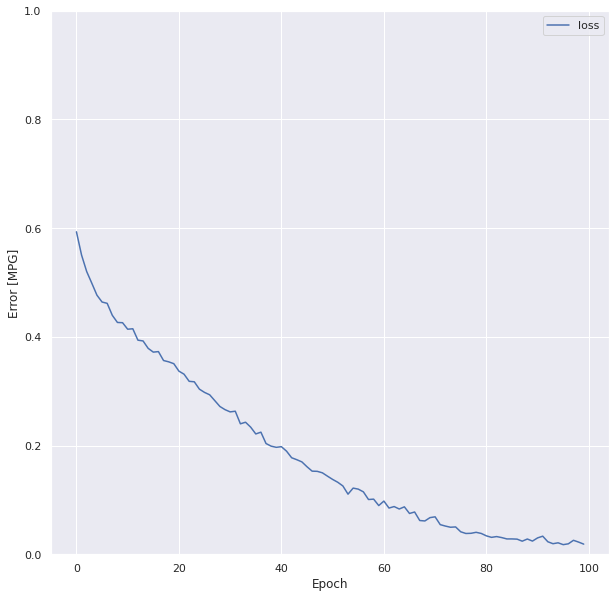

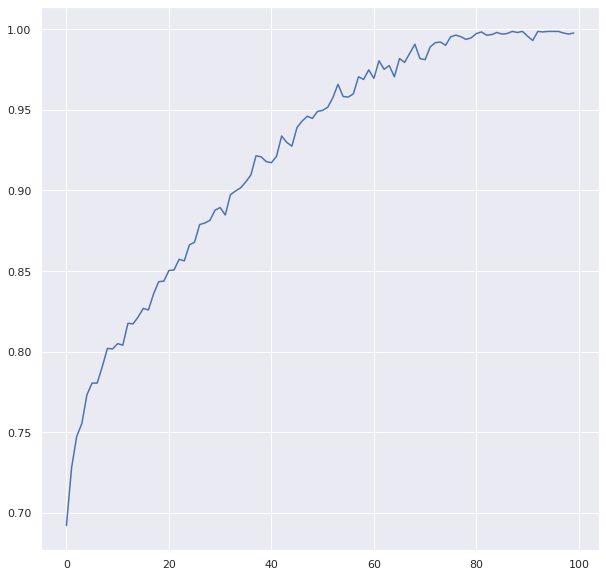

In [32]:
dnn_model_downsample = build_model2()
history2 = dnn_model_downsample.fit(features_downsample, target_downsample, validation_split = 0.25, verbose = 2, epochs = 100, shuffle = len(features_upsample))
results = dnn_model_downsample.evaluate(features_valid, target_valid, batch_size = len(features_valid))
#print(history2.history)
print(results)
plot_loss(history2, 1)
plt.show()
plt.plot(history2.history["accuracy"])
#plt.plot(history2.history["recall"])
#plt.plot(history2.history["precision"])
plt.show()

In [33]:
predict_dnn = dnn_model_downsample.predict(features_valid)
for i in range(len(predict_dnn)):
    predict_dnn[i] = np.round(predict_dnn[i])
    
    
#print(np.round(predict_dnn[0]))
print(predict_dnn)

#metric = tfa.metrics.F1Score(num_classes = len(predict_dnn))
print("F1 score:", f1_score(target_valid, predict_dnn))
print("AUC-ROC:", roc_auc_score(target_valid, predict_dnn))
print("Confusion matrix:", confusion_matrix(target_valid, predict_dnn))
#f1_score = 2 * (tf.compat.v2.metrics.recall(target_valid, predict_dnn))
#print("F1 score:", metric.update_state(target_valid, np.argmax(predict_dnn, axis = 1)).result())

94/94 [==============================] - 0s 1ms/step
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
F1 score: 0.6693688477127967
AUC-ROC: 0.8634891684657188
Confusion matrix: [[1851  543]
 [  28  578]]


As can be seen from the results - upsample shows the best accuracy results, AUC-ROC and F1 measures. Therefore, we use it for

# Model testing

In [34]:
predict_dnn = dnn_model_upsample.predict(features_test)
for i in range(len(predict_dnn)):
    predict_dnn[i] = np.round(predict_dnn[i])
    
    
#print(np.round(predict_dnn[0]))
print(predict_dnn)
print(features_test)
print(target_test.value_counts())

#metric = tfa.metrics.F1Score(num_classes = len(predict_dnn))
print(accuracy_score(target_test, predict_dnn))
print("F1 score:", f1_score(target_test, predict_dnn))
print("AUC-ROC:", roc_auc_score(target_test, predict_dnn))
print("Confusion matrix:", confusion_matrix(target_test, predict_dnn))

32/32 [==============================] - 0s 1ms/step
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]

# General conclusion:


1. Class imbalance is evil and you need to fight it, getting rid of it you guarantee yourself + 20 percent accuracy at least!)


2. The selection of hyperparameters added 3-5 percent of the accuracy to the models.


3. Without taking into account the neural network, the top 3 models for our task:

         3.1 1st place - CatBoost
          
         3.2 2nd place - XGBoost
              
         3.3 3rd place - SVC
        
        
4. The best results were shown by the neural network.